In [136]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Problem statement

### Data Gathering

In [2]:
df = pd.read_csv("Hotel Reservations.csv")
df.head().T

,0,1,2,3,4
Booking_ID,INN00001,INN00002,INN00003,INN00004,INN00005
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_year,2017,2018,2018,2018,2018


In [3]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
df.drop('Booking_ID',axis=1,inplace=True)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


### 1. no_of_adults

In [9]:
df['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

<AxesSubplot: >

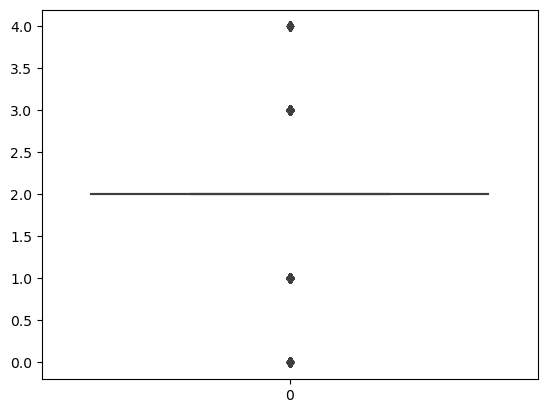

In [10]:
sns.boxplot(df['no_of_adults'])

In [11]:
df['no_of_adults'] =  np.where(df['no_of_adults'] == 4 , 3, df['no_of_adults'])
df['no_of_adults']

0        2
1        2
2        1
3        2
4        2
        ..
36270    3
36271    2
36272    2
36273    2
36274    2
Name: no_of_adults, Length: 36275, dtype: int64

<AxesSubplot: >

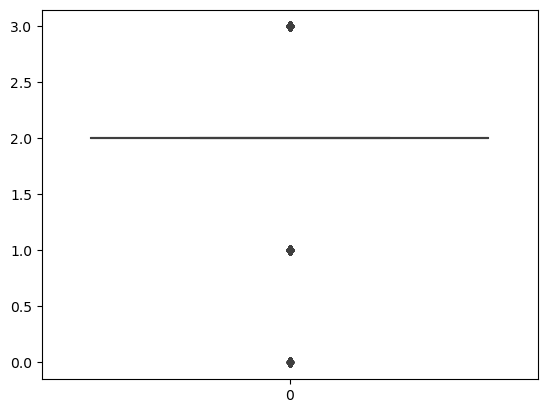

In [12]:
sns.boxplot(df['no_of_adults'])

In [13]:
df['no_of_adults'].value_counts()

2    26108
1     7695
3     2333
0      139
Name: no_of_adults, dtype: int64

### 2.no_of_children

In [14]:
df['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

<AxesSubplot: xlabel='no_of_children', ylabel='Density'>

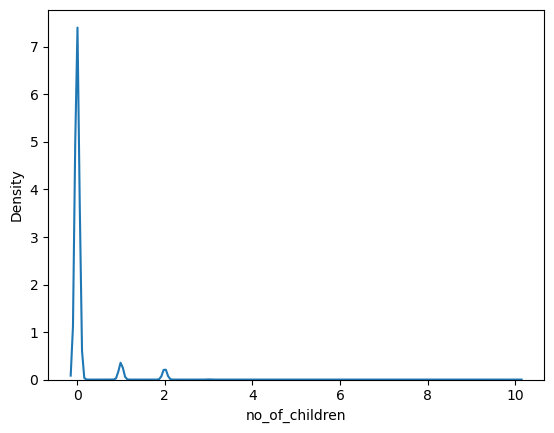

In [15]:
sns.kdeplot(x = df['no_of_children'])

<AxesSubplot: >

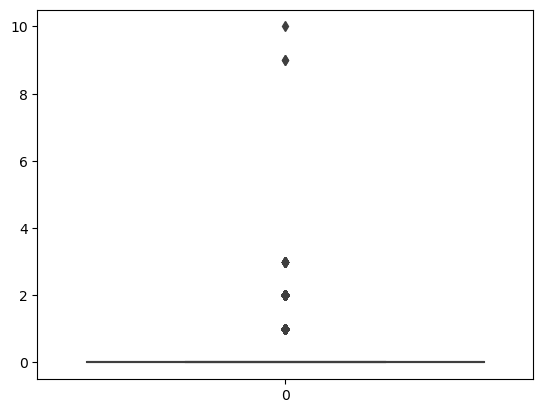

In [16]:
sns.boxplot(df['no_of_children'])

In [17]:
df['no_of_children'] = np.where(df['no_of_children'] >= 3 , 3 ,df['no_of_children'])

In [18]:
df['no_of_children'].value_counts()

0    33577
1     1618
2     1058
3       22
Name: no_of_children, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

### 3.no_of_weekend_nights

In [20]:
df['no_of_weekend_nights'].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

In [21]:
df['no_of_weekend_nights'] = np.where(df['no_of_weekend_nights'] >= 4 , 4 ,df['no_of_weekend_nights'])
df['no_of_weekend_nights'].value_counts()

0    16872
1     9995
2     9071
4      184
3      153
Name: no_of_weekend_nights, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

### 4. no_of_week_nights

In [23]:
df['no_of_week_nights'].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

In [24]:
df['no_of_week_nights'] = np.where(df['no_of_week_nights'] >= 10 , 10 , df['no_of_week_nights'])
df['no_of_week_nights'].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
10      115
7       113
8        62
9        34
Name: no_of_week_nights, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

### 5.type_of_meal_plan

In [26]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [27]:
df['type_of_meal_plan'].value_counts().to_dict()

{'Meal Plan 1': 27835,
 'Not Selected': 5130,
 'Meal Plan 2': 3305,
 'Meal Plan 3': 5}

In [28]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].replace({'Meal Plan 1': 1,
                                                             'Not Selected': 0,
                                                             'Meal Plan 2': 2,
                                                             'Meal Plan 3': 3})

In [29]:
df['type_of_meal_plan'].value_counts()

1    27835
0     5130
2     3305
3        5
Name: type_of_meal_plan, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

### 6.required_car_parking_space

In [31]:
df['required_car_parking_space'].value_counts().to_dict()

{0: 35151, 1: 1124}

<AxesSubplot: >

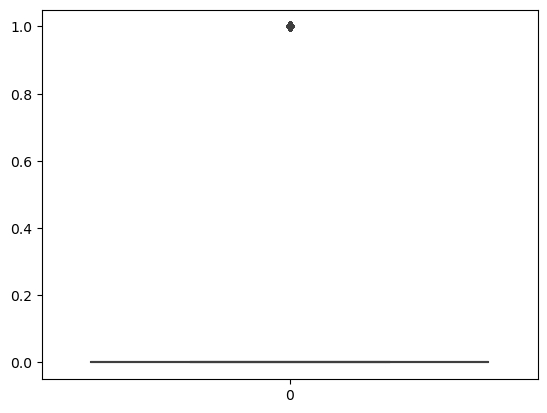

In [32]:
sns.boxplot(df['required_car_parking_space'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

### 6.room_type_reserved                    

In [34]:
df['room_type_reserved'].value_counts().to_dict()

{'Room_Type 1': 28130,
 'Room_Type 4': 6057,
 'Room_Type 6': 966,
 'Room_Type 2': 692,
 'Room_Type 5': 265,
 'Room_Type 7': 158,
 'Room_Type 3': 7}

In [35]:
df['room_type_reserved'] = df['room_type_reserved'].replace({'Room_Type 1': 1,
                                                             'Room_Type 4': 4,
                                                             'Room_Type 6': 6,
                                                             'Room_Type 2': 2,
                                                             'Room_Type 5': 5,
                                                             'Room_Type 7': 7,
                                                             'Room_Type 3': 3})

In [36]:
df['room_type_reserved'].value_counts()

1    28130
4     6057
6      966
2      692
5      265
7      158
3        7
Name: room_type_reserved, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

### 7. lead_time                             

In [38]:
df['lead_time'].value_counts()

0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64

<AxesSubplot: xlabel='lead_time', ylabel='Density'>

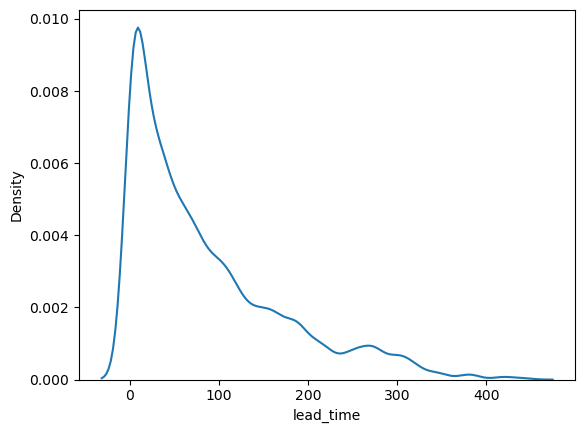

In [39]:
sns.kdeplot(df['lead_time'])

<AxesSubplot: >

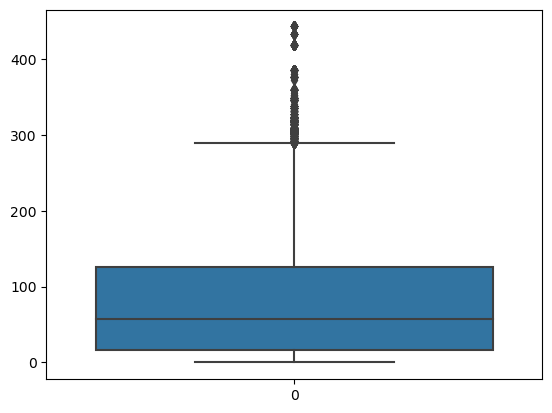

In [40]:
sns.boxplot(df['lead_time'])

### Outlier detection

In [41]:
q3 = df['lead_time'].quantile(0.75)
q1 = df['lead_time'].quantile(0.25)

q3

126.0

In [42]:
q1

17.0

In [43]:
upper_tail = q3 + 2.5 * (q3-q1)
upper_tail

398.5

In [44]:
df['lead_time'] = np.where(df['lead_time'] > upper_tail , upper_tail , df['lead_time'])

<AxesSubplot: xlabel='lead_time', ylabel='Density'>

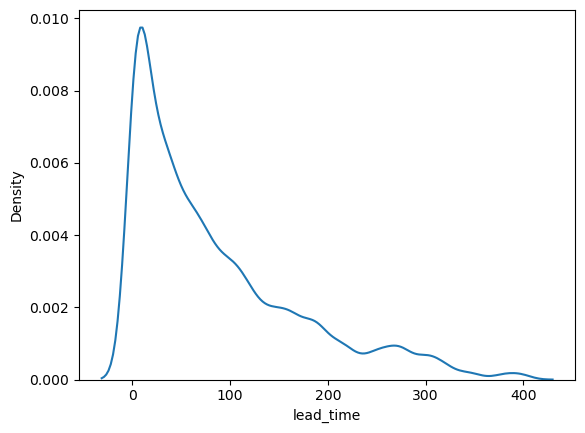

In [45]:
sns.kdeplot(df['lead_time'])

<AxesSubplot: >

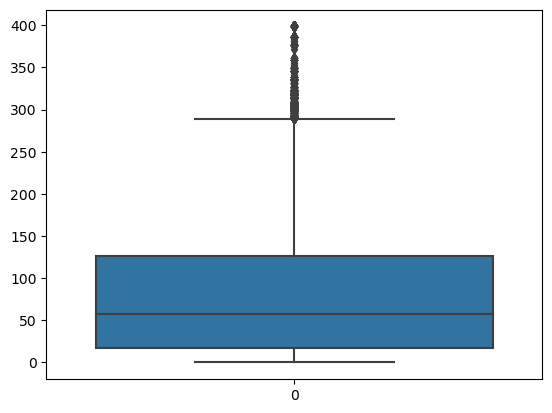

In [46]:
sns.boxplot(df['lead_time'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

### 8.arrival_year

In [48]:
df['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

### 9.arrival_month

In [49]:
df['arrival_month'].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

### 10. arrival_date

In [50]:
df['arrival_date'].value_counts()

13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

### 11.market_segment_type

In [52]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [53]:
df = pd.get_dummies(df,columns=['market_segment_type'])
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,1,0,1,224.0,2017,10,...,0,0,65.00,0,Not_Canceled,0,0,0,1,0
1,2,0,2,3,0,0,1,5.0,2018,11,...,0,0,106.68,1,Not_Canceled,0,0,0,0,1
2,1,0,2,1,1,0,1,1.0,2018,2,...,0,0,60.00,0,Canceled,0,0,0,0,1
3,2,0,0,2,1,0,1,211.0,2018,5,...,0,0,100.00,0,Canceled,0,0,0,0,1
4,2,0,1,1,0,0,1,48.0,2018,4,...,0,0,94.50,0,Canceled,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85.0,2018,8,...,0,0,167.80,1,Not_Canceled,0,0,0,0,1
36271,2,0,1,3,1,0,1,228.0,2018,10,...,0,0,90.95,2,Canceled,0,0,0,0,1
36272,2,0,2,6,1,0,1,148.0,2018,7,...,0,0,98.39,2,Not_Canceled,0,0,0,0,1
36273,2,0,0,3,0,0,1,63.0,2018,4,...,0,0,94.50,0,Canceled,0,0,0,0,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  repeated_guest 

### 12.repeated_guest

In [55]:
df['repeated_guest'].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

### 13.no_of_previous_cancellations

In [56]:
df['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

<AxesSubplot: >

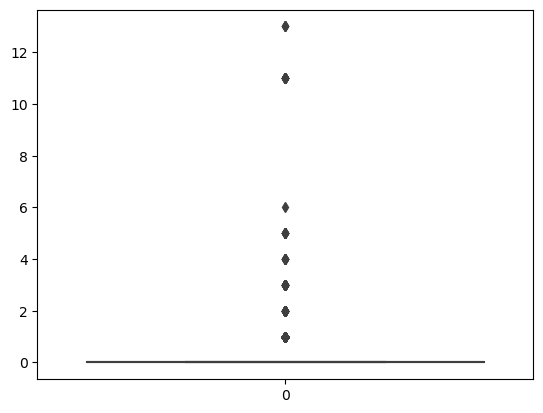

In [57]:
sns.boxplot(df['no_of_previous_cancellations'])

In [58]:
df['no_of_previous_cancellations'] = np.where(df['no_of_previous_cancellations'] >= 2 , 2 , df['no_of_previous_cancellations'])
df['no_of_previous_cancellations']

0        0
1        0
2        0
3        0
4        0
        ..
36270    0
36271    0
36272    0
36273    0
36274    0
Name: no_of_previous_cancellations, Length: 36275, dtype: int64

In [59]:
df['no_of_previous_cancellations'].value_counts()

0    35937
1      198
2      140
Name: no_of_previous_cancellations, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  repeated_guest 

### 13.  no_of_previous_bookings_not_canceled

In [61]:
df['no_of_previous_bookings_not_canceled'].value_counts()

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

<AxesSubplot: >

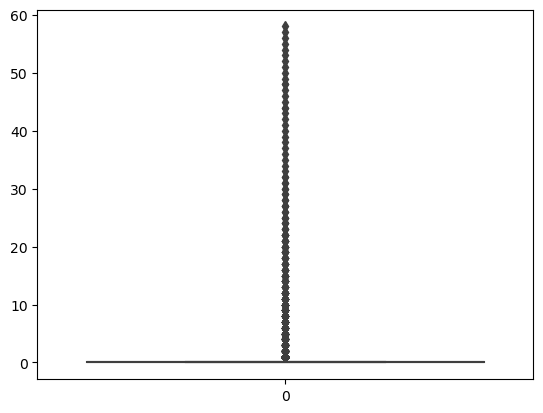

In [62]:
sns.boxplot(df['no_of_previous_bookings_not_canceled'])

In [63]:
df['no_of_previous_bookings_not_canceled'] = np.where(df['no_of_previous_bookings_not_canceled'] >= 6 , 6 , df['no_of_previous_bookings_not_canceled'])
df['no_of_previous_bookings_not_canceled'].value_counts()

0    35463
6      267
1      228
2      112
3       80
4       65
5       60
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  repeated_guest 

### 14.  avg_price_per_room

In [65]:
df['avg_price_per_room'].value_counts()

65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.80      1
Name: avg_price_per_room, Length: 3930, dtype: int64

<AxesSubplot: >

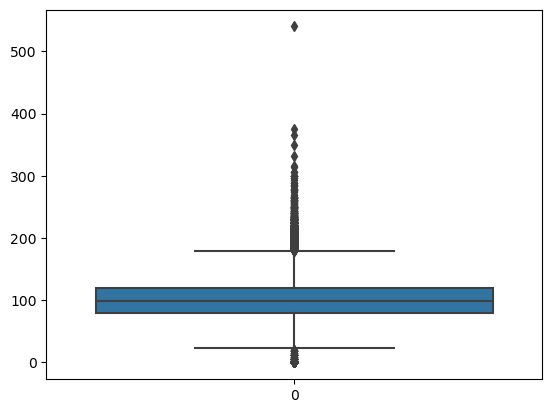

In [66]:
sns.boxplot(df['avg_price_per_room'])

<AxesSubplot: xlabel='avg_price_per_room', ylabel='Density'>

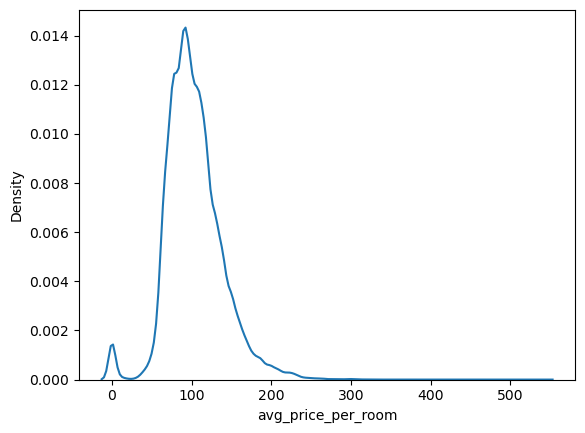

In [67]:
sns.kdeplot(df['avg_price_per_room'])

### Outlier detection

In [68]:
q3 = df['avg_price_per_room'].quantile(0.75)
q1 = df['avg_price_per_room'].quantile(0.25)

q3

120.0

In [69]:
upper_tail = q3 + 1.5 * (q3 - q1)
upper_tail

179.55

In [70]:
lower_tail = q1 - 1.5 * (q3-q1)
lower_tail

20.749999999999993

In [71]:
df['avg_price_per_room'] = np.where(df['avg_price_per_room'] > upper_tail , upper_tail , df['avg_price_per_room'])
df['avg_price_per_room'] = np.where(df['avg_price_per_room'] < lower_tail , lower_tail , df['avg_price_per_room'])


<AxesSubplot: >

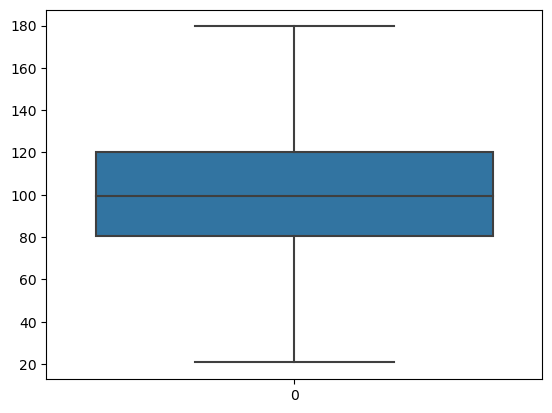

In [72]:
sns.boxplot(df['avg_price_per_room'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  repeated_guest 

### 15.  no_of_special_requests

In [74]:
df['no_of_special_requests'].value_counts()

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

In [75]:
df['no_of_special_requests'] = np.where(df['no_of_special_requests'] >= 3 , 3 , df['no_of_special_requests'])
df['no_of_special_requests'].value_counts()

0    19777
1    11373
2     4364
3      761
Name: no_of_special_requests, dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  repeated_guest 

### 16.  booking_status

In [77]:
df['booking_status'].value_counts().to_dict()

{'Not_Canceled': 24390, 'Canceled': 11885}

In [78]:
df['booking_status'] = df['booking_status'].replace({'Not_Canceled': 1, 'Canceled': 0})
df['booking_status'].value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  repeated_guest 

In [80]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,...,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844521,0.104755,0.808601,2.199862,0.949966,0.030986,1.708890,85.154294,2017.820427,7.423653,...,0.013177,0.078677,102.970177,0.617064,0.672364,0.003446,0.010779,0.055603,0.290227,0.639945
std,0.517305,0.394661,0.860863,1.379389,0.480191,0.173281,1.399851,85.630467,0.383836,3.069894,...,0.143954,0.606053,31.681213,0.776396,0.469358,0.058601,0.103261,0.229157,0.453873,0.480023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2017.000000,1.000000,...,0.000000,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,17.000000,2018.000000,5.000000,...,0.000000,0.000000,80.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,57.000000,2018.000000,8.000000,...,0.000000,0.000000,99.450000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,1.000000,0.000000,1.000000,126.000000,2018.000000,10.000000,...,0.000000,0.000000,120.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,3.000000,4.000000,10.000000,3.000000,1.000000,7.000000,398.500000,2018.000000,12.000000,...,2.000000,6.000000,179.550000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Engineering

In [83]:
scaler = StandardScaler()
array = scaler.fit_transform(x)
x_scaled = pd.DataFrame(array,columns=x.columns)

In [84]:
x_scaled

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.300560,-0.265435,0.222337,-0.144894,0.104198,-0.178819,-0.506411,1.621475,-2.137469,0.839242,...,-0.16221,-0.091538,-0.12982,-1.198524,-0.794791,-0.058803,-0.104385,-0.242645,1.563833,-1.333174
1,0.300560,-0.265435,1.383978,0.580075,-1.978334,-0.178819,-0.506411,-0.936062,0.467843,1.164990,...,-0.16221,-0.091538,-0.12982,0.117100,0.493229,-0.058803,-0.104385,-0.242645,-0.639454,0.750090
2,-1.632561,-0.265435,1.383978,-0.869863,0.104198,-0.178819,-0.506411,-0.982775,0.467843,-1.766747,...,-0.16221,-0.091538,-0.12982,-1.356349,-0.794791,-0.058803,-0.104385,-0.242645,-0.639454,0.750090
3,0.300560,-0.265435,-0.939304,-0.144894,0.104198,-0.178819,-0.506411,1.469657,0.467843,-0.789501,...,-0.16221,-0.091538,-0.12982,-0.093753,-0.794791,-0.058803,-0.104385,-0.242645,-0.639454,0.750090
4,0.300560,-0.265435,0.222337,-0.869863,-1.978334,-0.178819,-0.506411,-0.433897,0.467843,-1.115250,...,-0.16221,-0.091538,-0.12982,-0.267360,-0.794791,-0.058803,-0.104385,-0.242645,-0.639454,0.750090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.233680,-0.265435,1.383978,2.754982,0.104198,-0.178819,1.636704,-0.001802,0.467843,0.187744,...,-0.16221,-0.091538,-0.12982,2.046346,0.493229,-0.058803,-0.104385,-0.242645,-0.639454,0.750090
36271,0.300560,-0.265435,0.222337,0.580075,0.104198,-0.178819,-0.506411,1.668188,0.467843,0.839242,...,-0.16221,-0.091538,-0.12982,-0.379415,1.781249,-0.058803,-0.104385,-0.242645,-0.639454,0.750090
36272,0.300560,-0.265435,1.383978,2.754982,0.104198,-0.178819,-0.506411,0.733928,0.467843,-0.138004,...,-0.16221,-0.091538,-0.12982,-0.144573,1.781249,-0.058803,-0.104385,-0.242645,-0.639454,0.750090
36273,0.300560,-0.265435,-0.939304,0.580075,-1.978334,-0.178819,-0.506411,-0.258723,0.467843,-1.115250,...,-0.16221,-0.091538,-0.12982,-0.267360,-0.794791,-0.058803,-0.104385,-0.242645,-0.639454,0.750090


### Feature Selection

### Model training

In [82]:
x = df.drop('booking_status',axis=1)
y = df['booking_status']

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=7,stratify=y)

In [86]:
x_train.shape

(29020, 21)

In [87]:
x_test.shape

(7255, 21)

### 1.Logistic Regression

In [88]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

In [89]:
print("Training Accuracy: ",log_clf.score(x_train,y_train))
print("Testing Accuracy: ",log_clf.score(x_test,y_test))

Training Accuracy:  0.8030323914541695
Testing Accuracy:  0.8115782219159201


In [90]:
#x_test

##### Hyperparameter tuning

In [91]:
LogisticRegression()

LogisticRegression()

In [93]:
hyper = {'penalty' : ['l2','l1'],
        'C': np.arange(0,10,0.1),
        'solver': ['lbfgs','newton-cg','liblinear', 'sag', 'saga'],
        }

In [ ]:
gscv_log_clf = GridSearchCV(log_clf,hyper,cv=5,n_jobs=-1)
gscv_log_clf.fit(x_train,y_train)

In [ ]:
gscv_log_clf.best_estimator_

### 2.KNeighborsClassifier

In [95]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

print("Training Accuracy: ",knn_clf.score(x_train,y_train))
print("Testing Accuracy: ",knn_clf.score(x_test,y_test))

Training Accuracy:  0.893762922122674
Testing Accuracy:  0.8521019986216403


### Hyperparameter tuning

###### 1.diff k with Euclidean distance(p=2)

Text(0, 0.5, 'Accuracy')

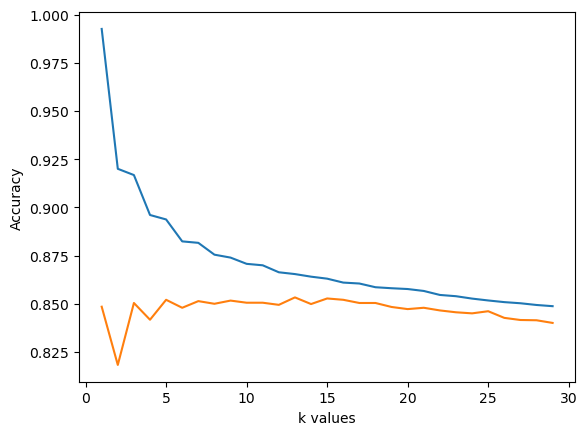

In [96]:
train_accuracy_list = []
test_accuracy_list = []
k_values = np.arange(1,30)

for k in k_values :
    model = KNeighborsClassifier(n_neighbors = k , p =2)
    model.fit(x_train,y_train)
    
    train_accuracy = model.score(x_train,y_train)
    train_accuracy_list.append(train_accuracy)
    
    test_accuracy = model.score(x_test,y_test)
    test_accuracy_list.append(test_accuracy)
    
plt.plot(k_values,train_accuracy_list)
plt.plot(k_values,test_accuracy_list)
plt.xlabel('k values')
plt.ylabel('Accuracy')

###### 2.diff k with Manhatten distance(p=1)

Text(0, 0.5, 'Accuracy')

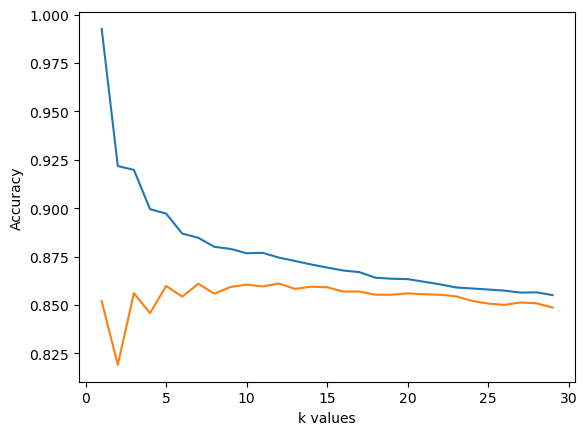

In [97]:
train_accuracy_list = []
test_accuracy_list = []
k_values = np.arange(1,30)

for k in k_values :
    model = KNeighborsClassifier(n_neighbors = k , p =1)
    model.fit(x_train,y_train)
    
    train_accuracy = model.score(x_train,y_train)
    train_accuracy_list.append(train_accuracy)
    
    test_accuracy = model.score(x_test,y_test)
    test_accuracy_list.append(test_accuracy)
    
plt.plot(k_values,train_accuracy_list)
plt.plot(k_values,test_accuracy_list)
plt.xlabel('k values')
plt.ylabel('Accuracy')

In [98]:
test_accuracy_list

[0.8519641626464507,
 0.8190213645761544,
 0.8560992419021365,
 0.8457615437629221,
 0.8598208132322536,
 0.8543073742246726,
 0.8609235010337698,
 0.8558235699517575,
 0.8592694693314955,
 0.8605099931082012,
 0.8595451412818745,
 0.8610613370089594,
 0.8583046175051688,
 0.8594073053066851,
 0.859131633356306,
 0.8569262577532736,
 0.8569262577532736,
 0.8552722260509993,
 0.8552722260509993,
 0.8559614059269469,
 0.8555478980013783,
 0.8552722260509993,
 0.8544452101998622,
 0.8521019986216403,
 0.850723638869745,
 0.8500344589937974,
 0.8512749827705031,
 0.8508614748449346,
 0.8486560992419021]

In [99]:
knn_clf = KNeighborsClassifier(n_neighbors=7,p=1)
knn_clf.fit(x_train,y_train)

print("Training Accuracy: ",knn_clf.score(x_train,y_train))
print("Testing Accuracy: ",knn_clf.score(x_test,y_test))

Training Accuracy:  0.8846657477601654
Testing Accuracy:  0.8609235010337698


### 3.Decision Tree

In [100]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

print("Training Accuracy: ",dt_clf.score(x_train,y_train))
print("Testing Accuracy: ",dt_clf.score(x_test,y_test))

Training Accuracy:  0.9941075120606478
Testing Accuracy:  0.867263955892488


### Hyperparameter tuning

In [101]:
dt_clf = DecisionTreeClassifier(random_state=7,max_features=None)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=7)

In [102]:
hyper = {'criterion':['gini','entropy'],
        'max_depth' : np.arange(3,10),
        'min_samples_split':np.arange(2,30),
        'min_samples_leaf' : np.arange(3,30),}

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
rscv_df_clf = RandomizedSearchCV(dt_clf,hyper,cv=5,n_jobs=-1)
rscv_df_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [105]:
rscv_df_clf.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=28, min_samples_split=21,
                       random_state=7)

In [106]:
model = rscv_df_clf.best_estimator_
model.fit(x_train,y_train)

print("Training Accuracy: ",model.score(x_train,y_train))
print("Testing Accuracy: ",model.score(x_test,y_test))

Training Accuracy:  0.8640937284631289
Testing Accuracy:  0.8640937284631289


### Pruning

In [107]:
dt_clf

DecisionTreeClassifier(random_state=7)

In [108]:
ccp_alphas_list = dt_clf.cost_complexity_pruning_path(x_train,y_train)['ccp_alphas']

In [109]:
len(ccp_alphas_list)

1500

Text(0, 0.5, 'Accuracy')

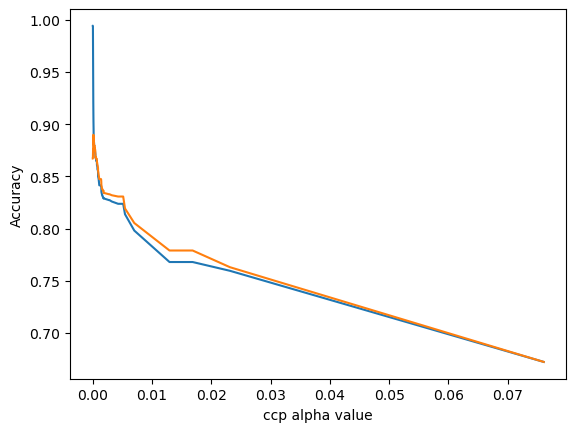

In [110]:
train_accuracy_list = []
test_accuracy_list = []

for i in ccp_alphas_list :
    model = DecisionTreeClassifier(random_state=7, ccp_alpha=i)
    model.fit(x_train,y_train)
    
    train_accuracy = model.score(x_train,y_train)
    train_accuracy_list.append(train_accuracy)
    
    test_accuracy = model.score(x_test,y_test)
    test_accuracy_list.append(test_accuracy)
    
plt.plot(ccp_alphas_list,train_accuracy_list)
plt.plot(ccp_alphas_list,test_accuracy_list)
plt.xlabel('ccp alpha value')
plt.ylabel('Accuracy')

In [111]:
maximum = np.max(test_accuracy_list)

In [112]:
ind = np.where(test_accuracy_list == maximum)[0][0]

In [113]:
train_accuracy_list[ind]

0.912026188835286

In [114]:
test_accuracy_list[ind]

0.8898690558235699

In [115]:
ccp_alphas_list[ind]

9.088086276232383e-05

### Best model 

In [116]:
dt_clf = DecisionTreeClassifier(random_state=7,ccp_alpha=ccp_alphas_list[ind])
dt_clf.fit(x_train,y_train)

print("Training Accuracy: ",dt_clf.score(x_train,y_train))
print("Testing Accuracy: ",dt_clf.score(x_test,y_test))

Training Accuracy:  0.912026188835286
Testing Accuracy:  0.8898690558235699


### 4.Random Forest

In [117]:
rf_clf = RandomForestClassifier(n_jobs=-1,random_state=7)
rf_clf.fit(x_train,y_train)

print("Training Accuracy: ",rf_clf.score(x_train,y_train))
print("Testing Accuracy: ",rf_clf.score(x_test,y_test))

Training Accuracy:  0.9941075120606478
Testing Accuracy:  0.9059958649207444


### Hyperparameter tuning

In [118]:
rf_clf = RandomForestClassifier(random_state=7,n_jobs=-1,oob_score=True)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=7)

In [119]:
hyper = { 'n_estimators' : np.arange(10,100,5),
        'criterion' : ['gini','entropy'],
        'max_depth': np.arange(2,10),
        'min_samples_split' : np.arange(5,20),
        'min_samples_leaf' : np.arange(3,30)}

In [120]:
rscv_rf_clf = RandomizedSearchCV(rf_clf,hyper,cv=5,n_jobs=-1)
rscv_rf_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=7),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])})

In [121]:
rscv_rf_clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=16,
                       min_samples_split=9, n_estimators=15, n_jobs=-1,
                       oob_score=True, random_state=7)

In [123]:
model = rscv_rf_clf.best_estimator_
model.fit(x_train,y_train)

print("Training Accuracy: ",model.score(x_train,y_train))
print("Testing Accuracy: ",model.score(x_test,y_test))

Training Accuracy:  0.8575465196416264
Testing Accuracy:  0.8628532046864231


### 5.AdaBoost

In [127]:
adaboost_clf = AdaBoostClassifier(random_state=7)
adaboost_clf.fit(x_train,y_train)

AdaBoostClassifier(random_state=7)

In [128]:
print("Training Accuracy: ",adaboost_clf.score(x_train,y_train))
print("Testing Accuracy: ",adaboost_clf.score(x_test,y_test))

Training Accuracy:  0.8186767746381806
Testing Accuracy:  0.8270158511371468


### Hyperparameter tuning

In [ ]:
AdaBoostClassifier()

In [131]:
hyper = {'n_estimators': np.arange(10,50,10),
    	'learning_rate' : np.arange(0,1.0,0.1),}

In [132]:
gscv_adaboost_clf = GridSearchCV(adaboost_clf,hyper,cv=5,n_jobs=-1)
gscv_adaboost_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=7), n_jobs=-1,
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': array([10, 20, 30, 40])})

In [133]:
gscv_adaboost_clf.best_estimator_

AdaBoostClassifier(learning_rate=0.7000000000000001, n_estimators=30,
                   random_state=7)

In [134]:
adaboost_clf = gscv_adaboost_clf.best_estimator_
adaboost_clf.fit(x_train,y_train)

print("Training Accuracy: ",adaboost_clf.score(x_train,y_train))
print("Testing Accuracy: ",adaboost_clf.score(x_test,y_test))

Training Accuracy:  0.8176085458304617
Testing Accuracy:  0.8267401791867678


### Best model with high testing data accuracy

In [135]:
dt_clf

DecisionTreeClassifier(ccp_alpha=9.088086276232383e-05, random_state=7)

### Model evaluation

Train Accuracy:  0.912026188835286
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      9508
           1       0.92      0.95      0.94     19512

    accuracy                           0.91     29020
   macro avg       0.91      0.89      0.90     29020
weighted avg       0.91      0.91      0.91     29020

Confusion matrix:
 [[ 7887  1621]
 [  932 18580]]


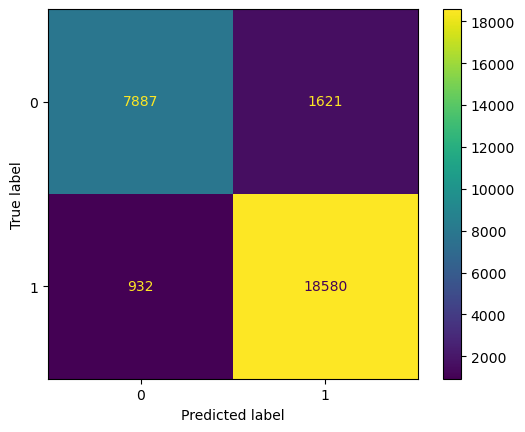

In [137]:
#train data evaluation

y_pred_train = dt_clf.predict(x_train)


accuracy = accuracy_score(y_train,y_pred_train)
print("Train Accuracy: ",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report:\n",clf_report)


cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix:\n",cnf_matrix)

ConfusionMatrixDisplay(cnf_matrix).plot()

test Accuracy:  0.8898690558235699
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      2377
           1       0.90      0.94      0.92      4878

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255

Confusion matrix:
 [[1894  483]
 [ 316 4562]]


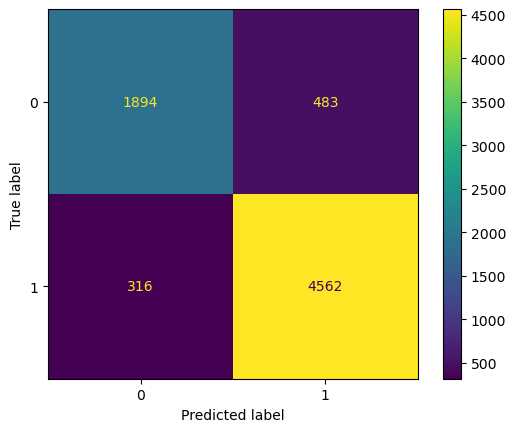

In [138]:
#test data evaluation

y_pred_test = dt_clf.predict(x_test)


accuracy = accuracy_score(y_test,y_pred_test)
print("test Accuracy: ",accuracy)

clf_report = classification_report(y_test,y_pred_test)
print("Classification report:\n",clf_report)


cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion matrix:\n",cnf_matrix)

ConfusionMatrixDisplay(cnf_matrix).plot()

### Save model

In [139]:
import pickle
import json

In [149]:
with open(r'artifacts/model.pkl','wb') as file:
    pickle.dump(dt_clf,file)
    
with open(r'artifacts/scaler.pkl','wb') as file:
    pickle.dump(scaler,file)
    

### Save data

In [144]:
list(x_train.columns)

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'market_segment_type_Aviation',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online']

In [145]:
data = {'features':['no_of_adults',
         'no_of_children',
         'no_of_weekend_nights',
         'no_of_week_nights',
         'type_of_meal_plan',
         'required_car_parking_space',
         'room_type_reserved',
         'lead_time',
         'arrival_year',
         'arrival_month',
         'arrival_date',
         'repeated_guest',
         'no_of_previous_cancellations',
         'no_of_previous_bookings_not_canceled',
         'avg_price_per_room',
         'no_of_special_requests',
         'market_segment_type_Aviation',
         'market_segment_type_Complementary',
         'market_segment_type_Corporate',
         'market_segment_type_Offline',
         'market_segment_type_Online'],
       'type_of_meal_plan':{'Meal Plan 1': 1,
           'Not Selected': 0,
           'Meal Plan 2': 2,
           'Meal Plan 3': 3},
       'room_type_reserved':{'Room_Type 1': 1,
           'Room_Type 4': 4,
           'Room_Type 6': 6,
           'Room_Type 2': 2,
           'Room_Type 5': 5,
           'Room_Type 7': 7,
           'Room_Type 3': 3},
       }

In [147]:
data['room_type_reserved']
data['type_of_meal_plan']

{'Meal Plan 1': 1, 'Not Selected': 0, 'Meal Plan 2': 2, 'Meal Plan 3': 3}

In [150]:
with open(r'artifacts/model_data.json','w') as file:
    json.dump(data,file)

In [152]:
df.head(1).T

,0
no_of_adults,2.0
no_of_children,0.0
no_of_weekend_nights,1.0
no_of_week_nights,2.0
type_of_meal_plan,1.0
required_car_parking_space,0.0
room_type_reserved,1.0
lead_time,224.0
arrival_year,2017.0
arrival_month,10.0


In [ ]:
2
0
1
1
Not Selected
0
Room_Type 1
48
2018
4
11
Online
0
0
0
94.5
0
Canceled